# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [45]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [46]:
# Your code here:

fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [52]:
# Your code here:

fifa['ValueNumeric'] = fifa['Value'].str.strip("€MK")

fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('float64')

fifa.info()


#Cambiando el nombre de las columnas porue me salió error al ponerlo con espacio

fifa = fifa.rename(columns = {'Preferred Foot':'Preferred_Foot'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [53]:
# Your code here:
#Importando librerias
import statsmodels.api as sm
from statsmodels.formula.api import ols

#H_0: Preferred foot and position have an impact on their value
#H_1: Do not have impact


In [57]:
#
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('float64')

#Entrenando el modelo
model = ols('ValueNumeric ~ C(Position)*C(Preferred_Foot)', data = fifa).fit()

#Prueba ANOVA
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Position),8.767522e+06,26.0,4.033759,2.141952e-11
C(Preferred_Foot),7.292211e+04,1.0,0.872300,3.503319e-01
C(Position):C(Preferred_Foot),3.050243e+06,26.0,1.403355,8.327900e-02
Residual,1.512530e+09,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
#Como el valor de P de la posición es menor a 0.05 rechazamos la hipótesis nula 
#por lo que podemos decir que la posición no tiene impacto
#Caso contrario en Preferred Foot, que no es menor a 0.05, es decir,
#aceptamos la hipótesis nula, lo que quiere decir que sí tiene impacto


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [58]:
# Your code here:

model = ols('ValueNumeric ~ C(Nationality)', data = fifa).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table


,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
#H_0 tiene impacto en el valor
#H_1 no tiene impacto en el valor

#Por el valor de  de p, que es muy pequeño, rechazamos la hipótesis nula,
#lo que quiere decir que la nacionalidad no tiene impacto

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [74]:
# Your code here:

#Importando libreria
from scipy.stats import linregress

# Revisando columnas vacías y eliminándolas
#fifa.isnull().sum()
fifa_1 = fifa.dropna()
#fifa_1.isnull().sum()
fifa_1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [79]:
# Your code here:

#Definiendo variables
x = sm.add_constant(fifa_1[['Stamina', 'SprintSpeed']])
y = fifa_1['ValueNumeric']

#Entrenando modelo
linreg_stats = sm.OLS(y, x).fit()

print(linreg_stats.summary())

#Usando modelo
predicciones = linreg_stats.predict(x)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Fri, 22 Jan 2021   Prob (F-statistic):             0.0116
Time:                        19:06:30   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:


#H_0 Stamina and Sprint impact the model
#H_0 does not impact

#R-Squared, which is an estimate of the strength of the relationship between your model 
#and the response variable that lies between 0 (worst) and 1 (best),

#In this case the model does not fit and Stamina and SpringSpeed do not explain the model

#F-Stat: It is a statistical test that compare the fit of the intercept-only model with your model. 
#In simple works, if P value for the F-Stat (here Prob (F-Statistic) is less than your significance level,
#one can reject the null hypothesis that a intercept-only model is better

#In this case the P-value is smaller than F-stat which means that we reject the H_0 hypothesis,
#which means Stamina and SprintSpeed impact

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [81]:
# Your code here:


#Definiendo variables
x = sm.add_constant(fifa_1['Potential'])
y = fifa_1['ValueNumeric']

#Entrenando modelo
linreg_stats = sm.OLS(y, x).fit()

print(linreg_stats.summary())

#Usando modelo
predicciones = linreg_stats.predict(x)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          9.15e-225
Time:                        19:26:18   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:


#This model is better that the last one. It explains 5.6% of variation.
#P-value is less that F which means we reject H_0


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

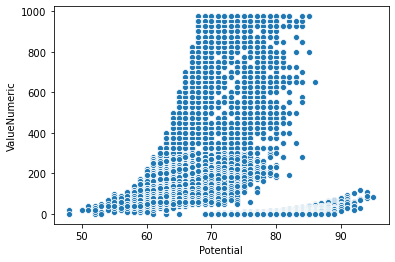

In [84]:
# Your code here:

import seaborn as sns



sns.scatterplot(x = fifa_1['Potential'], y = fifa_1['ValueNumeric'])

In [ ]:
#There is a linear correlation but it is not clearly marked.